### Importing Libraries

In [1]:
#Importing all the required libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib
import seaborn as sns
import bokeh as bk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

### Importing Dataset

In [2]:
#Reading the dataset into a Pandas Dataframe
#df = pd.read_csv('sales_sample_data.csv')
#working_dir="/Users/pwaghray/SEDS - IIITH/Part B - Data Science/Week - 4/"
df = pd.read_csv("sales_sample_data.csv", sep=",", encoding='unicode_escape')

### Pre-processing and Descriptive Analysis

In [3]:
#Updating the settings of the dataframe to accommodate more rows and columns in the output
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
#Checking the dimensions of the dataset
df.shape

(2823, 25)

In [5]:
#Reviewing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
#Reviewing the data by looking at count, mean, min, max etc
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [7]:
#Reviewing the datatypes
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [8]:
#Displaying top 5 rows
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [9]:
#Checking for duplicate rows
df.duplicated().sum()

0

In [10]:
#Checking if the dataset has any null values
df.isnull().sum().sort_values(ascending=False)

ADDRESSLINE2        2521
STATE               1486
TERRITORY           1074
POSTALCODE            76
ORDERNUMBER            0
CUSTOMERNAME           0
CONTACTFIRSTNAME       0
CONTACTLASTNAME        0
COUNTRY                0
CITY                   0
ADDRESSLINE1           0
PHONE                  0
PRODUCTCODE            0
QUANTITYORDERED        0
MSRP                   0
PRODUCTLINE            0
YEAR_ID                0
MONTH_ID               0
QTR_ID                 0
STATUS                 0
ORDERDATE              0
SALES                  0
ORDERLINENUMBER        0
PRICEEACH              0
DEALSIZE               0
dtype: int64

In [11]:
#Calculating the percentage of null values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Percent Missing': percent_missing})
missing_value_df

,Percent Missing
ORDERNUMBER,0.000000
QUANTITYORDERED,0.000000
PRICEEACH,0.000000
ORDERLINENUMBER,0.000000
SALES,0.000000
ORDERDATE,0.000000
STATUS,0.000000
QTR_ID,0.000000
MONTH_ID,0.000000
YEAR_ID,0.000000


In [12]:
#removing extra spaces in the columns
df.columns = df.columns.str.strip()

#### Imputing null values in STATE, POSTALCODE, TERRITORY and filling them with each column's mode

In [13]:
#Defining a function to impute null values
def null_impute(col):
    print("Checking for unique values:\n", df["{}".format(col)].unique())
    df["{}".format(col)].replace(to_replace='', value=np.nan, inplace=True)
    print("Number of null values before imputation:\n", df["{}".format(col)].isnull().sum())
    print("Imputing null values now using mode\n")
    df["{}".format(col)].fillna(df["{}".format(col)].mode()[0], inplace=True)
    print("Null values imputed and number of null values are:\n", df["{}".format(col)].isnull().sum())
    

In [14]:
null_impute('STATE')

Checking for unique values:
 ['NY' nan 'CA' 'Victoria' 'NJ' 'CT' 'MA' 'PA' 'NSW' 'Queensland' 'BC'
 'Tokyo' 'NH' 'Quebec' 'Osaka' 'Isle of Wight' 'NV']
Number of null values before imputation:
 1486
Imputing null values now using mode

Null values imputed and number of null values are:
 0


In [15]:
null_impute('POSTALCODE')

Checking for unique values:
 ['10022' '51100' '75508' '90003' nan '94217' '59000' 'N 5804' '75016'
 '3004' '94019' '97562' '44000' '51247' '21240' '4110' '70267' '5020'
 '2067' '50553' 'WX1 6LT' '28034' 'S-958 22' '28023' '79903' '4101'
 '71270' '69004' 'V3F 2K1' '97823' '106-0032' '10100' 'S-844 67' '78000'
 '62005' '58339' '2060' 'H1J 1C3' '530-0003' '24067' '1734' 'WX3 6FW'
 '31000' 'WA1 1DP' '8022' '91217' 'B-1180' 'T2F 8M4' '51003' 'PO31 7PJ'
 '90110' '75012' '8010' '69045' '1227 MM' '13008' '50739' '1203' '42100'
 '60528' 'FIN-02271' '2' 'EC2 5NT' '8200' '92561' '41101' '67000' '83030'
 'N 0106' '24100' '3150' '97561' '80686' 'B-6000']
Number of null values before imputation:
 76
Imputing null values now using mode

Null values imputed and number of null values are:
 0


In [16]:
null_impute('TERRITORY')

Checking for unique values:
 [nan 'EMEA' 'APAC' 'Japan']
Number of null values before imputation:
 1074
Imputing null values now using mode

Null values imputed and number of null values are:
 0


In [17]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
ORDERNUMBER,0.000000
QUANTITYORDERED,0.000000
PRICEEACH,0.000000
ORDERLINENUMBER,0.000000
SALES,0.000000
ORDERDATE,0.000000
STATUS,0.000000
QTR_ID,0.000000
MONTH_ID,0.000000
YEAR_ID,0.000000


#### Dropping Addressline2, orderdate and phone columns as they do not add any value to our dataset

In [18]:
df = df.drop(["ADDRESSLINE2", "ORDERDATE", "PHONE"], axis=1)

#### Replacing the values in Status with 1 for Shipped and 0 for everything else

In [19]:
df['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [20]:
df['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [21]:
df['STATUS']= df['STATUS'].replace({"Shipped" : 1, "Disputed" :0, "In Process":0, "Cancelled":0, "On Hold": 0, "Resolved" :0})

In [22]:
df['STATUS'].value_counts()

1    2617
0     206
Name: STATUS, dtype: int64

#### Storing STATUS column in another df and then dropping it

In [23]:
df_status = df['STATUS']

In [24]:
df = df.drop('STATUS', axis=1)

In [25]:
#Reviewing the dataframe and their datatypes
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,CA,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,CA,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,90003,USA,EMEA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,28034,USA,EMEA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,CA,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Torikatu 38,Oulu,CA,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,CA,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,1,3,2005,Ships,54,S72_3212,Alpha Cognac,1 rue Alsace-Lorraine,Toulouse,CA,31000,France,EMEA,Roulet,Annette,Small


In [26]:
#Reviewing datatypes
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
ADDRESSLINE1         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [27]:
#Reviewing size of the dataset
df.shape

(2823, 21)

In [28]:
#Reviewing the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   QTR_ID            2823 non-null   int64  
 6   MONTH_ID          2823 non-null   int64  
 7   YEAR_ID           2823 non-null   int64  
 8   PRODUCTLINE       2823 non-null   object 
 9   MSRP              2823 non-null   int64  
 10  PRODUCTCODE       2823 non-null   object 
 11  CUSTOMERNAME      2823 non-null   object 
 12  ADDRESSLINE1      2823 non-null   object 
 13  CITY              2823 non-null   object 
 14  STATE             2823 non-null   object 
 15  POSTALCODE        2823 non-null   object 
 16  COUNTRY           2823 non-null   object 


### Applying Standard Scalar transformation along with One Hot Encoding

In [29]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'ADDRESSLINE1', 'CITY', 'STATE',
       'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [30]:
# Import libraries and download example data
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define which columns should be encoded vs scaled
columns_to_encode = ['PRODUCTCODE', 'CUSTOMERNAME','ADDRESSLINE1', 'CITY',
                    'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY','CONTACTLASTNAME',
                    'CONTACTFIRSTNAME', 'DEALSIZE']

columns_to_scale  = ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',  
                  'SALES', 'YEAR_ID', 'MSRP',
                  'QTR_ID', 'MONTH_ID']

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(df[columns_to_scale]) 
encoded_columns = ohe.fit_transform(df[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
df = np.concatenate([scaled_columns, encoded_columns], axis=1)

### PCA FOR VISUALIZATION

In [31]:
pca1 = PCA(n_components=2)  

# # fit the PCA and transform the standardized data
pc1 = pca1.fit_transform(df)

pca1.explained_variance_ratio_

array([0.14847149, 0.13916491])

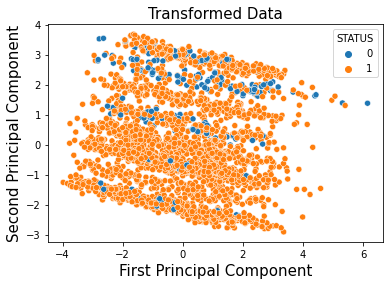

In [32]:
# create the dataframe using the 'DataFrame()'
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(pc1, columns=['PC1', 'PC2'])

# plot a scatterplot to visualize the dataset
# pass the variables on x and y axes to the parameter 'x' and 'y' respectively
# pass the dataframe to the parameter 'data'
# pass the target variable to the parameter 'hue' to display the classes of the target variables with different colors
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue=df_status)

# set the plot title and axes labels
# set the text size using 'fontsize'
plt.title('Transformed Data', fontsize = 15)
plt.xlabel('First Principal Component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)

# display the plot
plt.show()

#### Intuitions about the scatter plot 
PCA has simplified the model features into fewer, uncorrelated features to help visualize patterns in data and help it run faster. The first and second principal components carry more than 50% of the explained variance. We should expect to achieve no less than 90% of the original accuracy as using the full set of features.

### PCA for dimension reduction

In [33]:
#Applying the PCA on our DF
pca2 = PCA(n_components=72)
pc2 = pca2.fit_transform(df)

In [34]:
#cumulative explained variance
np.cumsum(pca2.explained_variance_ratio_)

array([0.14847149, 0.2876364 , 0.3730633 , 0.43731755, 0.49291251,
       0.529614  , 0.55525388, 0.57721581, 0.59854156, 0.61618727,
       0.62887369, 0.63916184, 0.64875558, 0.65759849, 0.66576452,
       0.67328838, 0.68079968, 0.68744058, 0.69405073, 0.70048979,
       0.70654144, 0.71231653, 0.71807352, 0.72364177, 0.72909385,
       0.73450231, 0.73987566, 0.74516594, 0.75037677, 0.75554227,
       0.76049786, 0.76530675, 0.76999936, 0.77457145, 0.77910102,
       0.78354003, 0.78784465, 0.79214057, 0.79639229, 0.80053523,
       0.80459237, 0.80853378, 0.81241845, 0.81617713, 0.81988747,
       0.8235148 , 0.8271146 , 0.83071035, 0.83426919, 0.83781685,
       0.84126918, 0.84470693, 0.8480601 , 0.8513843 , 0.85467505,
       0.85792279, 0.86110206, 0.8642309 , 0.86734074, 0.87040777,
       0.87342964, 0.87644139, 0.87934655, 0.88222804, 0.88503922,
       0.88769594, 0.89030515, 0.89289001, 0.89539784, 0.89778302,
       0.90015596, 0.90250256])

In [35]:
#viewing the principal components
pc2

array([[-3.05577850e-01,  2.02893267e-01,  2.70671447e+00, ...,
        -2.71211542e-02, -1.00209844e-01, -7.62065771e-02],
       [-7.73023608e-01, -3.58204745e-01,  1.93292581e+00, ...,
         9.74371920e-03,  1.72037741e-02,  5.75802288e-02],
       [ 4.24090852e-01, -1.25298859e+00,  1.18997909e+00, ...,
        -2.74459301e-01, -1.07887938e-01,  5.70205932e-01],
       ...,
       [ 1.47078514e+00,  2.83983263e+00, -5.87675994e-01, ...,
        -1.36877266e-03,  6.42516210e-03, -5.19621250e-03],
       [-1.09762870e+00,  3.23288175e+00, -6.35333791e-01, ...,
         1.06784777e+00, -1.05446576e+00,  3.05204547e-03],
       [-1.75081460e-01,  2.29095215e+00, -1.48461740e+00, ...,
        -6.48213436e-02, -7.00191675e-02,  9.84683091e-03]])

In [36]:
# Calculate the variance explained by principle components
print('Variance of each component:', pca2.explained_variance_ratio_)
print('Cumulative Explained Variance:', round(sum(list(pca2.explained_variance_ratio_))*100, 2))

Variance of each component: [0.14847149 0.13916491 0.0854269  0.06425426 0.05559496 0.03670149
 0.02563988 0.02196193 0.02132574 0.01764572 0.01268642 0.01028814
 0.00959375 0.00884291 0.00816604 0.00752386 0.0075113  0.00664089
 0.00661015 0.00643906 0.00605166 0.00577508 0.00575699 0.00556824
 0.00545208 0.00540846 0.00537336 0.00529028 0.00521083 0.0051655
 0.00495558 0.0048089  0.0046926  0.0045721  0.00452956 0.00443901
 0.00430462 0.00429592 0.00425172 0.00414294 0.00405714 0.00394141
 0.00388468 0.00375867 0.00371034 0.00362733 0.00359979 0.00359575
 0.00355884 0.00354766 0.00345232 0.00343775 0.00335317 0.0033242
 0.00329075 0.00324774 0.00317926 0.00312884 0.00310984 0.00306703
 0.00302187 0.00301175 0.00290516 0.00288148 0.00281118 0.00265672
 0.00260921 0.00258486 0.00250783 0.00238518 0.00237294 0.0023466 ]
Cumulative Explained Variance: 90.25


In [37]:
for i in pca2.explained_variance_:
    var = i/sum(pca2.explained_variance_)*100
    print(var)

16.451087751828748
15.419890629988009
9.465557892453134
7.119564872887525
6.160088671963299
4.066635854257562
2.8409758230891513
2.433447903288936
2.3629563946787098
1.955198767169473
1.405693342016757
1.1399571368864805
1.0630159777692847
0.9798204901179882
0.9048213399412001
0.833666379248991
0.8322743324292434
0.7358311195276632
0.7324250467418192
0.7134668176141327
0.6705418754933556
0.6398967552234262
0.6378921399505987
0.6169782324921705
0.6041072911774622
0.5992731988505107
0.5953839249770735
0.5861786161786566
0.5773759358637103
0.5723533546662181
0.5490936557183256
0.5328401637977341
0.5199542885935605
0.5066024129712425
0.5018893368424217
0.49185551705715846
0.47696493332577417
0.47600088657470385
0.47110328896017617
0.45905060067038944
0.44954335957751523
0.43671976241032984
0.430433841732883
0.4164723286170468
0.41111674016698224
0.40191958940722766
0.39886798053601713
0.398420175064428
0.39433054787529975
0.3930916884975562
0.382527979468318
0.38091345803756227
0.371541549

#### Observation:
In the first 11 dimensions we are able to see the maximum variance (approximately 90%).

Text(0, 0.5, 'Explained variance')

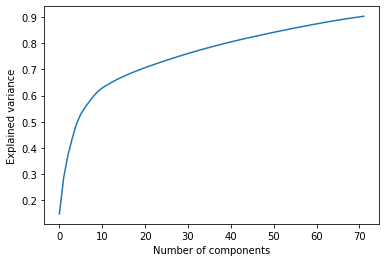

In [38]:
#plot between n_components and cumulative explained variance
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
#To show the plot
#plt.show()
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
#plt.savefig('elbow_plot.png', dpi=100)

### LDA

In [39]:
#Defining a function to test, train and predict the model on our dataset
def model_accuracy(df, df2, test_size, random_state, model):
    X_train, X_test, Y_train, Y_test = train_test_split(df, df2, test_size=test_size, random_state=random_state)
    model.fit(X_train, Y_train)
    X_pred = model.predict(X_test)
    print("Accuracy score for Test data: ", accuracy_score(Y_test, X_pred))

In [40]:
#Defining the LDA model with n_components = 1 and applying it to the train test data
lda = LDA(n_components = 1)
model_accuracy(df, df_status, 0.2, 42, lda)

Accuracy score for Test data:  0.9026548672566371


In [41]:
#Defining the RandomForestClassifier model and applying it to the train test data
rfc = RandomForestClassifier()
model_accuracy(df, df_status, 0.2, 42, rfc)

Accuracy score for Test data:  0.984070796460177
